In [197]:
import sys
import os
import random
sys.path.append(os.path.abspath('../'))

In [198]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

In [ ]:
def conf(G, e):
    delta = 0.01
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x*(1 + delta - abs(x))/(1+delta)

influence_values = {}

def get_unique_random_influence_for_pair(e):
    if e not in influence_values:
        influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

def random_inf(G, e):
    return get_unique_random_influence_for_pair(e)

# Experiment with function in R and M

In [297]:
def het_fn1(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x - 2.5 * (x ** 3)

def het_fn2(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if abs(x) <= 0.01:
        return 0
    else:
        return 1/(100*x)

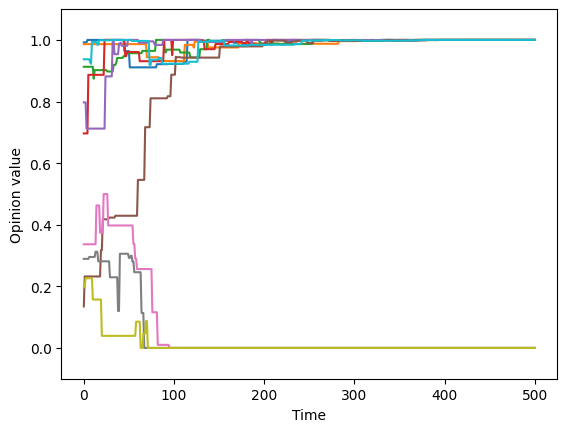

In [ ]:
n = 10
p = 0.4
B0 = []
influence_values = {}

graph = nx.fast_gnp_random_graph(n, p, directed=True)
str_con = nx.is_strongly_connected(graph)

if not str_con:
    graph = nx.fast_gnp_random_graph(n, p, directed=True)
    str_con = nx.is_strongly_connected(graph)

G = BiasedInfluenceGraph(n,G=graph, ops=B0, influence_fn=random_inf,bias_fn=het_fn1)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

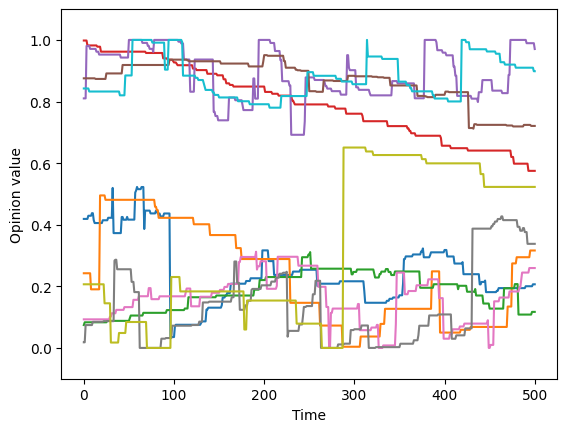

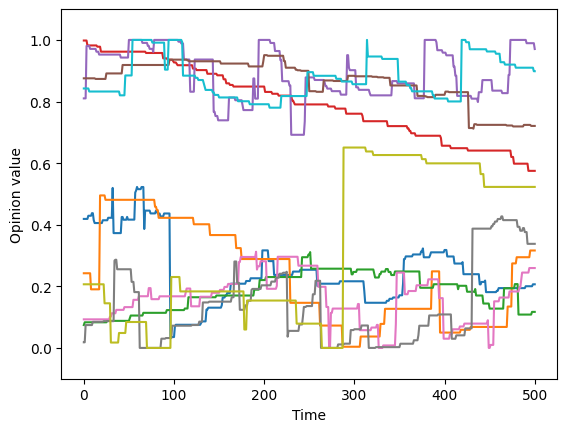

In [ ]:
n = 10
p = 0.4
B0 = []
influence_values = {}

graph = nx.fast_gnp_random_graph(n, p, directed=True)
str_con = nx.is_strongly_connected(graph)

if not str_con:
    graph = nx.fast_gnp_random_graph(n, p, directed=True)
    str_con = nx.is_strongly_connected(graph)

G = BiasedInfluenceGraph(n,G=graph, ops=B0, influence_fn=random_inf,bias_fn=het_fn2)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

# Experiment with function in R and I (Bounded Confidence)

In [ ]:
def bounded_fn(G,e):
    threshold = 0.8
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if abs(x) < threshold:
        return conf(G,e)
    else:
        return 0

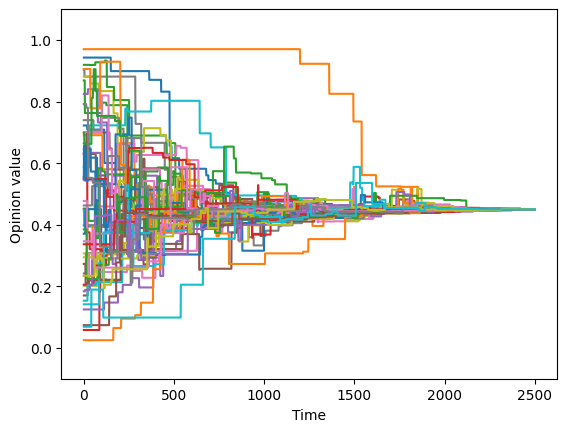

In [471]:
n = 50
p = 0.4
B0 = []
influence_values = {}

graph = nx.fast_gnp_random_graph(n, p, directed=True)
str_con = nx.is_strongly_connected(graph)

if not str_con:
    graph = nx.fast_gnp_random_graph(n, p, directed=True)
    str_con = nx.is_strongly_connected(graph)

G = BiasedInfluenceGraph(n,G=graph, ops=B0, influence_fn=random_inf,bias_fn=bounded_fn)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution().savefig('../images/HetAgents/BC08_evolution2.png')

# Plots

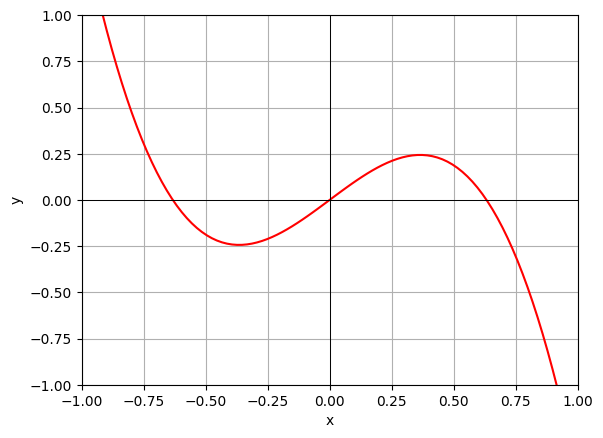

In [ ]:
#plot het_fn1
def plot_het_fn1(x):
    return x - 2.5 * (x ** 3)
    
x = np.linspace(-1, 1, 100)
y1 = [plot_het_fn1(i) for i in x]

# Remove the line at x=0 and plot a dot instead
plt.plot(x, y1, color='red', label='het_fn1: x - 2.5 * (x ** 3)')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

# Highlight x=0 and y=0
plt.axvline(x=0, color='black', linewidth=0.7)
plt.axhline(y=0, color='black', linewidth=0.7)
plt.xlim([-1, 1]) # Sets x-axis limits from -1 to 1
plt.ylim([-1, 1]) # Sets y-axis limits from -1 to 1
#plt.legend()

#plt.savefig('../images/HetAgents/het_fn1.png')
plt.show()

C:\Users\mauricio.munoz\AppData\Local\Temp\ipykernel_28092\2642548993.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(100*x)


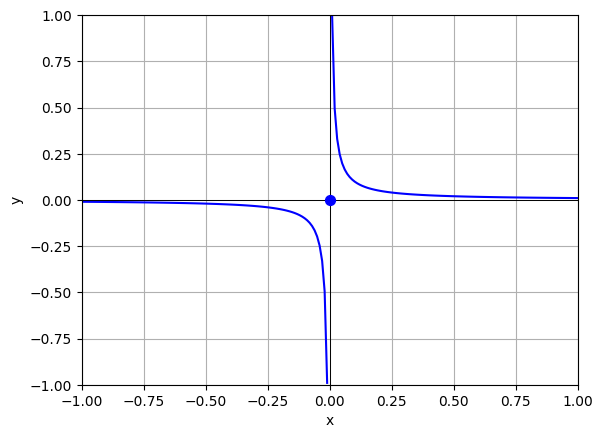

In [ ]:
def plot_het_fn2(x):
    return 1/(100*x)

x1 = np.linspace(-1, 0, 100)
x2 = np.linspace(0, 1, 100)
y2_1 = [plot_het_fn2(i) for i in x1]
y2_2 = [plot_het_fn2(i) for i in x2]

plt.plot(x1, y2_1, color='blue', label='het_fn2: 1/(10*x)')
plt.plot(x2, y2_2, color='blue', label='het_fn2: 1/(10*x)')
plt.scatter(0, 0, color='blue', s=50, zorder=5)  # Dot at x=0, y=0 for het_fn2
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

# Highlight x=0 and y=0
plt.axvline(x=0, color='black', linewidth=0.7)
plt.axhline(y=0, color='black', linewidth=0.7)
plt.xlim([-1, 1]) # Sets x-axis limits from -1 to 1
plt.ylim([-1, 1]) # Sets y-axis limits from -1 to 1
#plt.legend()

#plt.savefig('../images/HetAgents/het_fn2.png')
plt.show()

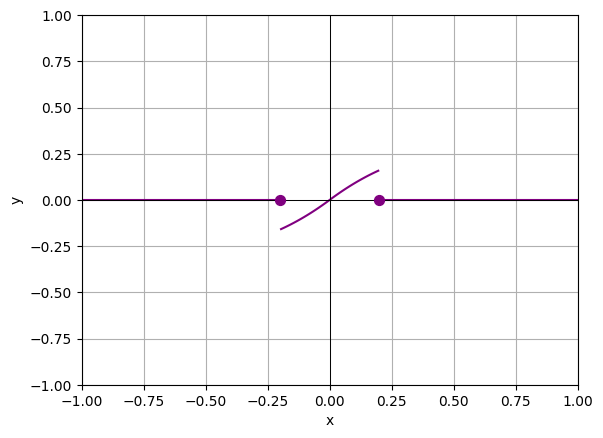

In [317]:
threshold = 0.2
def plot_bounded_fn(x):
    if abs(x) < threshold:
        delta = 0.01
        return x*(1 + delta - abs(x))/(1+delta)
    
def plot_bounded_fn2(x):
    if abs(x) >= threshold:
        return 0
    
x31 = np.linspace(-1, -threshold, 100)
x32 = np.linspace(-threshold, threshold, 100)
x33 = np.linspace(threshold, 1, 100)
y31 = [plot_bounded_fn2(i) for i in x31]
y32 = [plot_bounded_fn(i) for i in x32]
y33 = [plot_bounded_fn2(i) for i in x33]

plt.plot(x31, y31, color='purple')
plt.scatter(-threshold, 0, color='purple', s=50, zorder=5)
plt.plot(x32, y32, color='purple')
plt.plot(x33, y33, color='purple')
plt.scatter(threshold, 0, color='purple', s=50, zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

# Highlight x=0 and y=0
plt.axvline(x=0, color='black', linewidth=0.7)
plt.axhline(y=0, color='black', linewidth=0.7)
plt.xlim([-1, 1]) # Sets x-axis limits from -1 to 1
plt.ylim([-1, 1]) # Sets y-axis limits from -1 to 1
#plt.legend()

plt.savefig('../images/HetAgents/het_fn3_02.png')
plt.show()